## 1. data clean, jump to the next section for experiment

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import re as r

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
def str2target(x, target):
    if type(x) == str:
        try:
            res = target(x.replace(',', ''))
        except Exception as e:
            res = 0
    else:
        res = x
    return res

In [ ]:
data_path = []
for name in glob.glob(r'../data/*.csv'):
    print(name)
    data_path.append(name)

../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv
../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv
../data/house_sale.csv


In [ ]:
df_annual = pd.read_csv('../data/NYC_Citywide_Annualized_Calendar_Sales_Update.csv')
df_annual['SALE DATE'] = pd.to_datetime(df_annual['SALE DATE'], format='%m/%d/%Y')
df_annual.head()

In [ ]:
df_annual = df_annual[df_annual['BOROUGH'].isin(['MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND', 'BROOKLYN'])]
df_annual = df_annual[df_annual['SALE PRICE'] != 0]
df_annual = df_annual[df_annual['LAND SQUARE FEET'] != 0]
df_annual = df_annual[df_annual['GROSS SQUARE FEET'] != 0]

attributes = ['SALE PRICE', 'SALE DATE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'BOROUGH']
df_filter = df_annual[attributes]
df_filter = df_filter.dropna().reset_index(drop=True)

df_filter['LAND SQUARE FEET'] = df_filter['LAND SQUARE FEET'].apply(lambda x: str2target(x, float))
df_filter['GROSS SQUARE FEET'] = df_filter['GROSS SQUARE FEET'].apply(lambda x: str2target(x, float))
# df_filter['BOROUGH'] = df_filter['BOROUGH'].apply(str2int)

df_filter.head()

,SALE PRICE,SALE DATE,GROSS SQUARE FEET,LAND SQUARE FEET,BOROUGH
0,4350000,2020-07-16,3084,2381,MANHATTAN
1,3672530,2020-11-24,6929,1501,MANHATTAN
2,1,2020-06-26,13206,2764,MANHATTAN
3,2500,2020-02-11,13248,2772,MANHATTAN
4,290000,2020-02-07,13248,2772,MANHATTAN


In [ ]:
le = preprocessing.LabelEncoder()
df_filter['BOROUGH'] = le.fit_transform(df_filter['BOROUGH'])                      
le.classes_

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

remove outlier and visualize sale price histgram

Q1=16746
Q3=50238
low=-440000.0
high=2200000.0
IQR=660000



(array([2.25486763e-07, 1.26224865e-07, 1.89217993e-07, 2.52449731e-07,
        4.27589714e-07, 6.78369172e-07, 9.39408875e-07, 1.23027487e-06,
        1.43190060e-06, 1.23528569e-06, 1.15177207e-06, 1.05537350e-06,
        8.45635015e-07, 7.96958507e-07, 3.57438277e-07, 2.82514632e-07,
        3.67221300e-07, 3.75095441e-07, 2.40519214e-07, 2.45291421e-07,
        2.07113768e-07, 1.95660472e-07, 1.33621786e-07, 1.45075082e-07,
        1.14532959e-07, 1.15010180e-07, 7.08672684e-08, 9.95005082e-08,
        6.72881135e-08, 4.41429113e-08]),
 array([1.20000000e+03, 7.44770333e+04, 1.47754067e+05, 2.21031100e+05,
        2.94308133e+05, 3.67585167e+05, 4.40862200e+05, 5.14139233e+05,
        5.87416267e+05, 6.60693300e+05, 7.33970333e+05, 8.07247367e+05,
        8.80524400e+05, 9.53801433e+05, 1.02707847e+06, 1.10035550e+06,
        1.17363253e+06, 1.24690957e+06, 1.32018660e+06, 1.39346363e+06,
        1.46674067e+06, 1.54001770e+06, 1.61329473e+06, 1.68657177e+06,
        1.75984880e+06

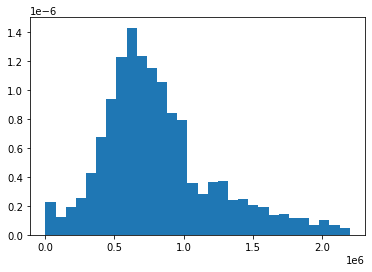

In [ ]:
df_Q1 = int(np.ceil(0.25*len(df_filter)))
df_Q3 = int(np.ceil(0.75*len(df_filter)))
print(f"Q1={df_Q1}\nQ3={df_Q3}")

df_filter_sort_price=df_filter.sort_values(by="SALE PRICE")
df_filter_sort_price.reset_index(inplace=True,drop=True)
IQR=df_filter_sort_price["SALE PRICE"].iloc[df_Q3-1]-df_filter_sort_price["SALE PRICE"].iloc[df_Q1-1]
low = df_filter_sort_price["SALE PRICE"].iloc[df_Q1-1]-1.5*IQR
high= df_filter_sort_price["SALE PRICE"].iloc[df_Q3-1]+1.5*IQR
print(f"low={low}\nhigh={high}\nIQR={IQR}\n")

df_filter_new=df_filter_sort_price[df_filter_sort_price["SALE PRICE"]<high]
# sale price lower than 1000 is usually rental deal, which we will ignore.
low = 1000  
df_filter_new=df_filter_new[df_filter_new["SALE PRICE"]>low]
df_filter_new=df_filter_new.sort_values(by="SALE DATE")
# sale price histgram plot
plt.hist(df_filter_new['SALE PRICE'], density=True, bins=30)

In [ ]:
# df_filter_new.to_csv("../data/house_sale.csv")

## 2. experiment

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# comment if not using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# comment if not using google colab
%cd /content/drive/MyDrive/Explore_task/code

/content/drive/MyDrive/Explore_task/code


In [7]:
vaccination_data=pd.read_csv("../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")
case_data=pd.read_csv("../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
vaccine=vaccination_data[vaccination_data["Location"]=='NY']
case=case_data[case_data["state"]=='NY']

vaccine1=vaccine.copy()
case1=case.copy()

case1['submission_date'] = pd.to_datetime(case1['submission_date'])
case1=case1.sort_values(by="submission_date")

vaccine1['Date'] = pd.to_datetime(vaccine1['Date'])
vaccine1=vaccine1.sort_values(by="Date")

case1 = case1[case1['tot_cases']>0]
vaccine1 = vaccine1[vaccine1['Administered']>0]


vaccine1.reset_index(inplace=True,drop=True)
case1.reset_index(inplace=True,drop=True)

case_data=case1[["submission_date", "tot_cases", "new_case", "tot_death", "new_death"]]
vaccine_data=vaccine1[["Date","Administered", "Distributed"]]

In [8]:
case_data.head()

,submission_date,tot_cases,new_case,tot_death,new_death
0,2020-03-04,1,1,0,0
1,2020-03-05,12,11,0,0
2,2020-03-06,21,9,0,0
3,2020-03-07,28,7,0,0
4,2020-03-08,28,0,0,0


In [9]:
vaccine_data.head()

,Date,Administered,Distributed
0,2020-12-15,147,87750
1,2020-12-16,2363,90675
2,2020-12-17,8514,151125
3,2020-12-18,16887,151125
4,2020-12-19,23063,151125


In [10]:
house_sale = pd.read_csv("../data/house_sale.csv")
house_sale['SALE DATE'] = pd.to_datetime(house_sale['SALE DATE'])
house_sale.head()

,Unnamed: 0,SALE PRICE,SALE DATE,GROSS SQUARE FEET,LAND SQUARE FEET,BOROUGH
0,56663,1690673,2020-01-01,9880.0,3800.0,3
1,12087,481650,2020-01-02,0.0,0.0,1
2,20369,600000,2020-01-02,1594.0,4177.0,3
3,17655,565000,2020-01-02,1296.0,2500.0,3
4,38384,860000,2020-01-02,1580.0,1620.0,3


In [11]:
house_sale_case = house_sale[house_sale['SALE DATE'] >= case_data['submission_date'][0]]
house_sale_vacc = house_sale[house_sale['SALE DATE'] >= vaccine_data['Date'][0]]

## daily sale count v.s. new cases/ vacc

In [12]:
# group by the date and sum up the number of daily sale deals
house_sale_case_count = house_sale_case[['SALE PRICE', 'SALE DATE']].groupby('SALE DATE').count().reset_index()
house_sale_case_count = house_sale_case_count.rename(columns={'SALE PRICE':'count'})
house_sale_case_count

,SALE DATE,count
0,2020-03-04,132
1,2020-03-05,163
2,2020-03-06,148
3,2020-03-07,1
4,2020-03-09,126
...,...,...
573,2021-12-27,82
574,2021-12-28,117
575,2021-12-29,151
576,2021-12-30,158


In [13]:
# do filtering in covid case dataset by the dates that exit in the house sale dataset 
case_date_list = list(house_sale_case_count['SALE DATE'])
case_data_sale_count = case_data[case_data['submission_date'].isin(case_date_list)]
case_data_sale_count = case_data_sale_count.reset_index(drop=True)
case_data_sale_count

,submission_date,tot_cases,new_case,tot_death,new_death
0,2020-03-04,1,1,0,0
1,2020-03-05,12,11,0,0
2,2020-03-06,21,9,0,0
3,2020-03-07,28,7,0,0
4,2020-03-09,125,97,0,0
...,...,...,...,...,...
573,2021-12-27,1820459,8369,23404,90
574,2021-12-28,1833465,13006,23446,42
575,2021-12-29,1860964,27499,23516,70
576,2021-12-30,1891186,30222,23568,52


In [14]:
# filter out rows that have the same dates in both vacc and house sale dataset 
vaccine_data_sale_count = vaccine_data[vaccine_data['Date'].isin(case_date_list)]
vaccine_data_sale_count = vaccine_data_sale_count.reset_index(drop=True)
vacc_date_list = list(vaccine_data_sale_count['Date'])
house_sale_vacc_count = house_sale_case_count[house_sale_case_count['SALE DATE'].isin(vacc_date_list)]
house_sale_vacc_count = house_sale_vacc_count.reset_index(drop=True)
house_sale_vacc_count

,SALE DATE,count
0,2020-12-15,170
1,2020-12-16,180
2,2020-12-17,130
3,2020-12-18,236
4,2020-12-20,2
...,...,...
320,2021-12-27,82
321,2021-12-28,117
322,2021-12-29,151
323,2021-12-30,158


In [15]:
# person correlation function
def person_correlattion(a, b):
  s_ab = ((a - a.mean()) * (b - b.mean())).sum() / (np.sqrt(((a - a.mean()) ** 2).sum()) * np.sqrt(((b - b.mean()) ** 2).sum()))
  return s_ab

daily sale count v.s. new cases

In [16]:
# 5 days delay, take into account that COVID19 takes some time to show symptoms
delay_days = 5  
pr = person_correlattion(case_data_sale_count['new_case'].to_numpy()[:-delay_days], house_sale_case_count['count'].to_numpy()[delay_days:])
pr

0.12181532292676565

daily sale count v.s. new vacc

In [17]:
delay_days = 5  # 5 days delay
pr = person_correlattion(vaccine_data_sale_count['Administered'].to_numpy()[:-delay_days], house_sale_vacc_count['count'].to_numpy()[delay_days:])
pr

0.10515213940801929

## average price v.s. new cases/ vacc

In [18]:
# group by the date and average the daily sale price 
house_sale_case_price = house_sale_case[['SALE PRICE', 'SALE DATE']].groupby('SALE DATE').mean().reset_index()
house_sale_case_price = house_sale_case_price.rename(columns={'SALE PRICE':'price'})
house_sale_case_price

,SALE DATE,price
0,2020-03-04,767483.022727
1,2020-03-05,820287.269939
2,2020-03-06,807379.331081
3,2020-03-07,110000.000000
4,2020-03-09,790496.015873
...,...,...
573,2021-12-27,850688.231707
574,2021-12-28,899873.538462
575,2021-12-29,871038.920530
576,2021-12-30,878706.873418


In [19]:
# filter out rows in case dataset that have the same dates in both dataset 
case_date_list = list(house_sale_case_price['SALE DATE'])
case_data_sale_price = case_data[case_data['submission_date'].isin(case_date_list)]
case_data_sale_price = case_data_sale_price.reset_index(drop=True)
case_data_sale_price

,submission_date,tot_cases,new_case,tot_death,new_death
0,2020-03-04,1,1,0,0
1,2020-03-05,12,11,0,0
2,2020-03-06,21,9,0,0
3,2020-03-07,28,7,0,0
4,2020-03-09,125,97,0,0
...,...,...,...,...,...
573,2021-12-27,1820459,8369,23404,90
574,2021-12-28,1833465,13006,23446,42
575,2021-12-29,1860964,27499,23516,70
576,2021-12-30,1891186,30222,23568,52


In [20]:
# filter out rows in vacc dataset that have the same dates in both dataset 
vaccine_data_sale_price = vaccine_data[vaccine_data['Date'].isin(case_date_list)]
vaccine_data_sale_price = vaccine_data_sale_price.reset_index(drop=True)
vacc_date_list = list(vaccine_data_sale_price['Date'])
house_sale_vacc_price = house_sale_case_price[house_sale_case_price['SALE DATE'].isin(vacc_date_list)]
house_sale_vacc_price = house_sale_vacc_price.reset_index(drop=True)
house_sale_vacc_price

,SALE DATE,price
0,2020-12-15,783893.941176
1,2020-12-16,806318.461111
2,2020-12-17,907335.530769
3,2020-12-18,827994.919492
4,2020-12-20,939234.000000
...,...,...
320,2021-12-27,850688.231707
321,2021-12-28,899873.538462
322,2021-12-29,871038.920530
323,2021-12-30,878706.873418


avg daily sale price v.s. new covid case

In [21]:
delay_days = 5
pr = person_correlattion(case_data_sale_price['new_case'].to_numpy()[:-delay_days], house_sale_case_price['price'].to_numpy()[delay_days:])
pr

0.12501277199981028

avg daily sale price v.s. new vacc

In [22]:
delay_days = 5
pr = person_correlattion(vaccine_data_sale_price['Administered'].to_numpy()[:-delay_days], house_sale_vacc_price['price'].to_numpy()[delay_days:])
pr

0.13794515770345336

## re-open event in NYS

In [24]:
# reopen date is 2020-06-19, we set a delay of 5 days to take into account that COVID19 takes some time to show symptoms
reopen_date = '2020-06-24'
# use 60 samples to perform hypothesis test (two months before and after reopen)
duration = 60

In [25]:
case_data_bf_reop = case_data[case_data['submission_date'] < reopen_date]
case_data_bf_reop = case_data_bf_reop.iloc[-duration:]
case_data_bf_reop.head()

,submission_date,tot_cases,new_case,tot_death,new_death
52,2020-04-25,127030,5913,4715,163
53,2020-04-26,129787,2757,4831,116
54,2020-04-27,131507,1720,4947,116
55,2020-04-28,132768,1261,5060,113
56,2020-04-29,134850,2082,5170,110


In [26]:
case_data_aft_reop = case_data[case_data['submission_date'] >= reopen_date]
case_data_aft_reop = case_data_aft_reop.iloc[:duration]
case_data_aft_reop.head()

,submission_date,tot_cases,new_case,tot_death,new_death
112,2020-06-24,176318,289,8636,9
113,2020-06-25,176716,398,8645,9
114,2020-06-26,177150,434,8654,9
115,2020-06-27,177489,339,8664,10
116,2020-06-28,177789,300,8667,3


In [27]:
cases_1 = case_data_bf_reop['new_case'].to_numpy()  # before reopen
cases_2 = case_data_aft_reop['new_case'].to_numpy()  # after reopen

one-tailed Z-Test, null hypothesis is: avg new cases before reopen is smaller than avg new cases after reopen

In [29]:
numerator = cases_1.mean() - cases_2.mean()
denominator = np.sqrt(cases_1.std()**2/len(cases_1) + cases_2.std()**2/len(cases_2))
z = numerator / denominator
z_005 = 1.645
print(z)
if z > z_005:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

5.086880617661573
reject null hypothesis


reject null hypothesis. So we have larger avg new cases before reopen